In [1]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm 
import matplotlib.animation as anim

In [2]:
class Particle():
    
    # init
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        self.dt  = t[1] - t[0]
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
    # Method
    def Evolution(self,i):
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
    
        # Euler method
        self.r += self.dt * self.v
        self.v += self.dt * self.a
            
    def CheckWallLimits(self,limits,dim=2):
        
        for i in range(dim):
            if self.r[i] - self.radius < - limits[i]:
                self.v[i] = - self.v[i]*0.9
    
    def ReduceSizevelocity(self,factor):
        
        self.RvVector = np.array([self.vVector[0]]) # initial condition
        for i in range(1,len(self.vVector)):
            if i%factor == 0:
                self.RvVector = np.vstack([self.RvVector,self.vVector[i]])
        
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]]) # initial condition
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
    # Setters
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v
        
    # Getters  
    def GetPositionVector(self):
        return self.rVector

    def GetRPositionVector(self):
        return self.RrVector
    
    def GetVelocityVector(self):
        return self.vVector
    def GetRVelocityVector(self):
        return self.RvVector
    def GetR(self):
        return self.radius

In [3]:
# Discretization
dt = 0.001
tmax = 30
t = np.arange(0,tmax+dt,dt)

In [4]:
def GetindividualParticle(position, velocity, aceleration, t):

    x0 = position
    v0 = velocity
    a0 = aceleration
        
    p = Particle(x0,v0,a0,t,1.,1.0,1)
        
    return p

In [5]:
Limits = np.array([20.,20.])
position=np.array([-15.,5.])
velocity=np.array([1.,0.])
aceleration=np.array([0.,-9.8])

In [6]:
def RunSimulation(t,P, Limits):
    
    for it in tqdm(range(len(t))): # Evolucion temporal
        P.CheckWallLimits(Limits)
        P.Evolution(it)

    return P

In [7]:
P = GetindividualParticle(position,velocity,aceleration,t)
P = RunSimulation(t,P, Limits)


100%|██████████| 30001/30001 [00:00<00:00, 137210.69it/s]


In [8]:
def ReduceTime(t,factor):
    
    P.ReduceSize(factor)
    P.ReduceSizevelocity(factor)
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])        
    return np.array(Newt)

In [9]:
redt = ReduceTime(t,200)
print(P.GetRPositionVector())

[[-1.50000000e+01  5.00000000e+00]
 [-1.48000000e+01  4.80498000e+00]
 [-1.46000000e+01  4.21796000e+00]
 [-1.44000000e+01  3.23894000e+00]
 [-1.42000000e+01  1.86792000e+00]
 [-1.40000000e+01  1.04900000e-01]
 [-1.38000000e+01 -2.05012000e+00]
 [-1.36000000e+01 -4.59714000e+00]
 [-1.34000000e+01 -7.53616000e+00]
 [-1.32000000e+01 -1.08671800e+01]
 [-1.30000000e+01 -1.45902000e+01]
 [-1.28000000e+01 -1.87052200e+01]
 [-1.26000000e+01 -1.55444495e+01]
 [-1.24000000e+01 -1.21985335e+01]
 [-1.22000000e+01 -9.24461752e+00]
 [-1.20000000e+01 -6.68270152e+00]
 [-1.18000000e+01 -4.51278552e+00]
 [-1.16000000e+01 -2.73486952e+00]
 [-1.14000000e+01 -1.34895352e+00]
 [-1.12000000e+01 -3.55037520e-01]
 [-1.10000000e+01  2.46878480e-01]
 [-1.08000000e+01  4.56794480e-01]
 [-1.06000000e+01  2.74710480e-01]
 [-1.04000000e+01 -2.99373520e-01]
 [-1.02000000e+01 -1.26545752e+00]
 [-1.00000000e+01 -2.62354152e+00]
 [-9.80000000e+00 -4.37362552e+00]
 [-9.60000000e+00 -6.51570952e+00]
 [-9.40000000e+00 -9

<IPython.core.display.Javascript object>


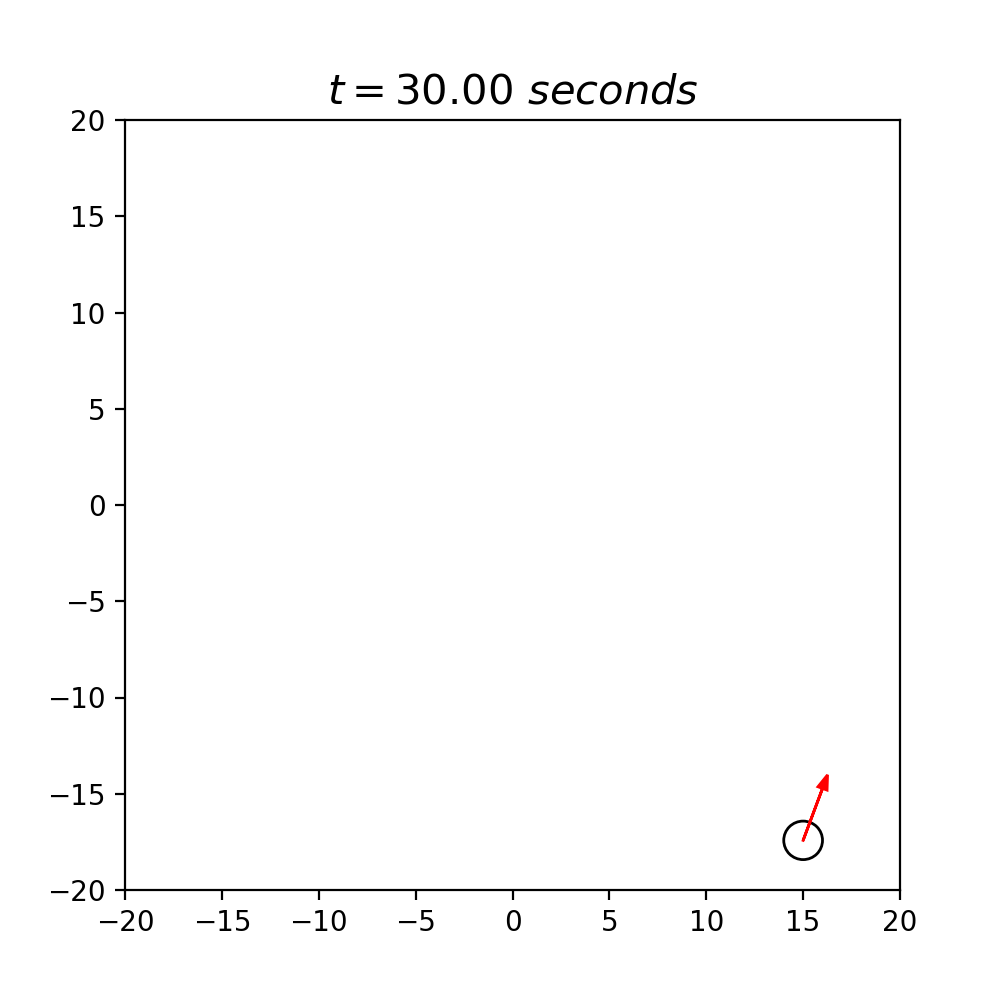

In [10]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)


def init():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])

def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
    
    x = P.GetRPositionVector()[i,0]
    y = P.GetRPositionVector()[i,1]
        
    vx = P.GetRVelocityVector()[i,0]
    vy = P.GetRVelocityVector()[i,1]
        
    circle = plt.Circle( (x,y), P.GetR(), color='k', fill=False )
    plot = ax.add_patch(circle)
    plot = ax.arrow(x,y,vx,vy,color='r',head_width=0.5)
        
    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)

In [16]:
Writer = anim.writers['ffmpeg']
writer_ = Writer(fps=50, metadata=dict(artist='Me'))
Animation.save('ParabolicMotion.mp4', writer=writer_)

RuntimeError: Requested MovieWriter (ffmpeg) not available

In [11]:
def mechanicEnergy(position, velocity):
    m = P.m
    g = 9.8
        
    total_energy = (m*g*(position[:,1])) + (0.5*m)*(velocity[:,1]**2)
    return total_energy

In [12]:
position = P.GetPositionVector()
velocity = P.GetVelocityVector()
energy = mechanicEnergy(position, velocity)
print(energy)

[  49.           49.00004802   49.00009604 ... -167.08907217 -167.08902415
 -167.08897613]


<IPython.core.display.Javascript object>


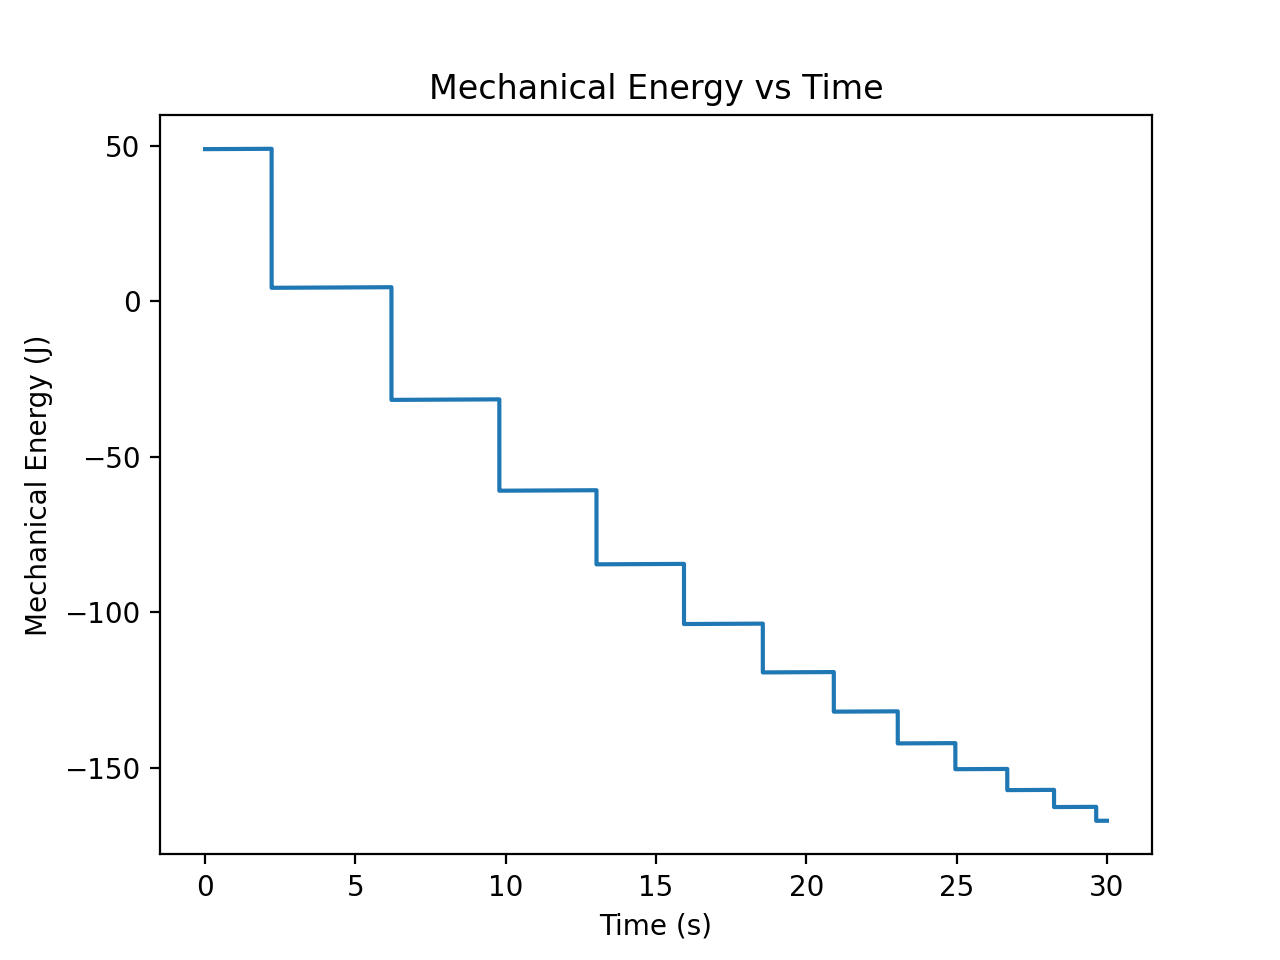

In [17]:
plt.figure()
plt.plot(t, energy)
plt.xlabel("Time (s)")
plt.ylabel("Mechanical Energy (J)")
plt.title("Mechanical Energy vs Time")

plt.show()